# <center>Practice 7 - Intelligent Systems</center>
## Types of stars

#### Alvaro Bryan Cori Sanchez
#### Mauricio Balderrama Ali

![Types](images/TypesStars.jpg)
Ref.- [VectorStock](https://www.vectorstock.com/royalty-free-vector/diagram-showing-different-types-stars-vector-29444775)


In [186]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

from clean_variables import *
from select_variables import *

import csv 
import pandas as pd
import random
import matplotlib.pyplot as plt

seed = 7
numpy.random.seed(seed)

# Data Inputs, data cleansing and data analysis

### Getting the data inputs

In the first step we get the data inputs from a .csv file where we recieve 7 columns, 6 for the x variable and 1 for the y variable 

In [187]:
stars = pd.read_csv("assignment_ds.csv")

In [188]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.07730,17.08,Red,M,0
1,12098,689.000000,7.01000,0.02,Blue-white,A,3
2,2731,0.000437,0.08560,18.09,Red,M,0
3,37800,202900.000000,6.86000,-4.56,Blue,O,3
4,8570,0.000810,0.00970,14.20,Blue white,A,2
...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2
196,19860,0.001100,0.01310,11.34,Blue,B,2
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3
198,39000,204000.000000,10.60000,-4.70,Blue,O,3


#### Applying cleanliness to the data

2 columns of x variable are text and we will convert this type to a array of 0 and 1, first we filter the unique values and apply to lower a the colors column because some camps have upper letters that mark different for the similars texts that they don't have upper letters.

In [189]:
print(clean_colors(stars))
print(clean_spectral_classes(stars))

{'white-yellow', 'orange', 'orange-red', 'whitish', 'pale yellow orange', 'yellow-white', 'blue white', 'white', 'red', 'yellowish white', 'blue', 'yellowish', 'blue-white'}
{'O', 'F', 'M', 'G', 'K', 'A', 'B'}


We use this values for the variable x.

In [190]:
colors = ['whitish','red','pale yellow orange','white-yellow','blue','yellow-white','yellowish','yellowish white','orange-red','orange','white','blue white','blue-white']
spectral_classes = ['O', 'F', 'G', 'K', 'A', 'M', 'B']

#### Data Analysis

For the analysis we apply the covariance and correlation in order to observe the relationship that exists between the variables x and y, with the correlation being 0 the worst relationship and 1 or -1 the best relationship..
* The number columns can be applied for the analysis.
* The categories columns (texts) need be assigned a number for get the correlation.

In [191]:
stars_analysis = stars.copy()

In [192]:
stars_analysis['Number_Color']=ListCagetorietoNumber(stars_analysis.Color,colors)
stars_analysis['Numbr_Spectral_Class']=ListCagetorietoNumber(stars_analysis.Spectral_Class,spectral_classes)
stars_analysis

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Number_Color,Numbr_Spectral_Class
0,3453,0.000621,0.07730,17.08,Red,M,0,1,5
1,12098,689.000000,7.01000,0.02,Blue-white,A,3,12,4
2,2731,0.000437,0.08560,18.09,Red,M,0,1,5
3,37800,202900.000000,6.86000,-4.56,Blue,O,3,4,0
4,8570,0.000810,0.00970,14.20,Blue white,A,2,11,4
...,...,...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2,11,6
196,19860,0.001100,0.01310,11.34,Blue,B,2,4,6
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3,12,4
198,39000,204000.000000,10.60000,-4.70,Blue,O,3,4,0


### Covariance
Covariance is the value that reflects the amount by which any two variables vary jointly with respect to their arithmetic means. This measure allows us to know how the variables in question behave with respect to other variables.  
#### Covariance of the variables

The following table shows that:
* The star type depends on the Temperature variable in a proportional way.
* The star type depends on the variable L proportionally.
* The star type depends on the variable R in a proportional way.
* Star type depends on the variable A_M inversely proportionally.
* The star type depends on the variable Color proportionally.
* Star type depends on Spectral_Class variable inversely proportionally


In [193]:
cov_mat = stars_analysis.cov()
cov_mat= cov_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
cov_mat

,Type
Temperature,6428.207940
L,210878.875596
R,590.250620
A_M,-16.944131
Type,2.873467
Number_Color,1.534271
Numbr_Spectral_Class,-1.421407


### Correlation
Correlation is a type of association between two numerical variables, specifically it evaluates the trend (increasing or decreasing) in the data.

Two variables are associated when one variable gives us information about the other. Conversely, when there is no association, the increase or decrease of one variable tells us nothing about the behavior of the other variable.
![Types](images/correlation.png)
#### Correlation between the variables
The following table shows that:

* **Temperature**      : High Positive Correlation
* **L**                : High Positive Correlation
* **R**                : High Positive Correlation
* **A_M**	           : Perfect Negative Correlation
* **Color**            : Low Positive Correlation
* **Spectral_Class**   : Low Negative Correlation

In [194]:
corr_mat= stars_analysis.corr(method='spearman')
corr_mat=corr_mat.drop(['Temperature', 'L', 'R','A_M','Number_Color','Numbr_Spectral_Class'], axis=1)
corr_mat

,Type
Temperature,0.556591
L,0.846269
R,0.809410
A_M,-0.951591
Type,1.000000
Number_Color,0.319005
Numbr_Spectral_Class,-0.333179


#### Plots of correlations

R: 0.557


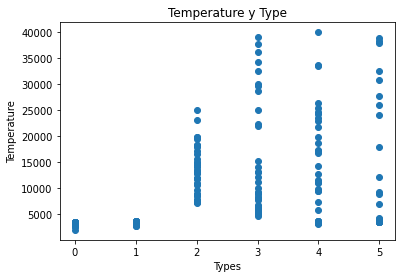

In [195]:
plt.scatter(stars_analysis['Type'],stars_analysis['Temperature'])
plt.title('Temperature y Type')
plt.xlabel("Types")
plt.ylabel("Temperature")
print('R:',corr_mat.iloc[0][0].round(3))

R: 0.846


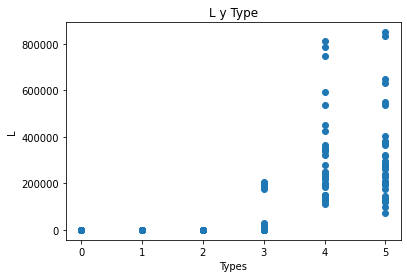

In [196]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['L'])
plt.title('L y Type')
plt.xlabel("Types")
plt.ylabel("L")
print('R:',corr_mat.iloc[1][0].round(3))

R: 0.809


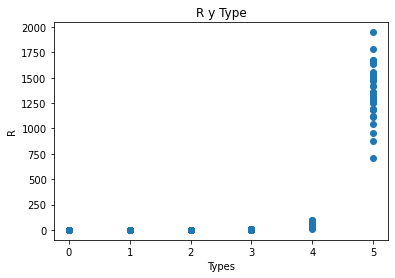

In [197]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['R'])
plt.title('R y Type')
plt.xlabel("Types")
plt.ylabel("R")
print('R:',corr_mat.iloc[2][0].round(3))

R: -0.952


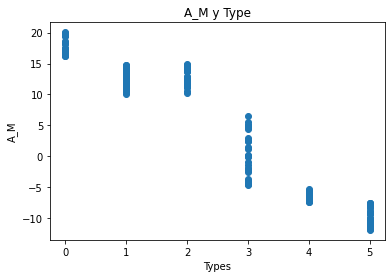

In [198]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars['A_M'])
plt.title('A_M y Type')
plt.xlabel("Types")
plt.ylabel("A_M")
print('R:',corr_mat.iloc[3][0].round(3))

R: 0.319


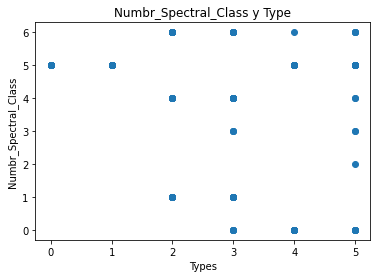

In [199]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Numbr_Spectral_Class'])
plt.title('Numbr_Spectral_Class y Type')
plt.xlabel("Types")
plt.ylabel("Numbr_Spectral_Class")
print('R:',corr_mat.iloc[5][0].round(3))

R: -0.333


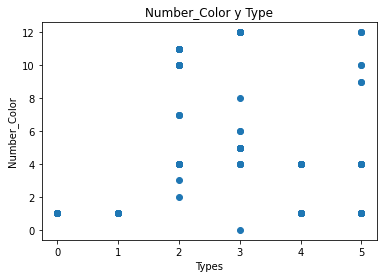

In [200]:
#Graficas de correlaciones
plt.scatter(stars_analysis['Type'],stars_analysis['Number_Color'])
plt.title('Number_Color y Type')
plt.xlabel("Types")
plt.ylabel("Number_Color")
print('R:',corr_mat.iloc[6][0].round(3))

## Aplication of the Neuronal Network

stars_inputs are the variable x and types is the variable y.
Then we select aleatory indexs of the dataset in order to assign differents values for the training and different values for the test. (Its guarantied that a row chosen by his index only can be part of the training or the test part).
We separate 160 rows for the training part, if we get 200 rows in a dataset, 40 rows are for the test part.

In this part we select the columns for variable x. we can exclude some variables for the correlation of this variables with the variable y. Sometimes the cases need only a pair of columns and in other cases the neuronal network can use with a high assert using all the columns of input. 

We mainly use two inputs:

* The function get_inputs use all the columns and need the dataset, unique values of colors and unique valors of spectral classes
* The function get_best_inputs use only Relative Luminosity (L), Relative Radius (R) and Absolute Magnitude (A_M).


##### Is important say that the correlation of the columns can variate depending of the csv of input.

In [201]:
types = stars.iloc[:,-1]
stars_inputs = get_best_inputs(stars)
#stars_inputs = get_inputs(stars,colors, spectral_classes)
stars_inputs

,L,R,A_M
0,0.000621,0.07730,17.08
1,689.000000,7.01000,0.02
2,0.000437,0.08560,18.09
3,202900.000000,6.86000,-4.56
4,0.000810,0.00970,14.20
...,...,...,...
195,0.000590,0.00981,13.67
196,0.001100,0.01310,11.34
197,998.000000,6.21000,-1.38
198,204000.000000,10.60000,-4.70


In [202]:
index_list = rand_index(stars.shape[0])
x_train, y_train, x_test, y_test = select_variables(stars_inputs,types,index_list, 160)

In this part we build a neuronal network that have caps with dimentions ,number of neurones and function of activation, this camps might be variate for the differents results.
The compile have a optimizer of neurones, a function of loss and the metrics that can be used.

The first layer have the input layer and one hidden layer, the input layer must be have the same numbers of inputs for the columns of variable x, the number of neurones of hidden layers can be variate.

The last layer or output layer is an array of 0 and 1 that represent the type of output.

Types :

[0,1,2,3,4,5]

Domains for each type: 

[({0,1},{0,1},{0,1},{0,1},{0,1},{0,1}]

In [203]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 3), (160,), (40, 3), (40,))

In [204]:
model = Sequential()

model.add(Dense(64, input_dim=3, activation='selu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [205]:
#target_training
y = []
ls = []
y=IntegerEncode2(y_train)
target_test=IntegerEncode2(y_test)

In [206]:
num_epochs=2000
history = model.fit(x_train, y,validation_data=(x_test, target_test), epochs=num_epochs,batch_size=64,verbose=1)


Epoch 1/2000
3/3 [==============================] - 1s 183ms/step - loss: 15421.2422 - accuracy: 0.0063 - val_loss: 20534.1758 - val_accuracy: 0.0000e+00
Epoch 2/2000
3/3 [==============================] - 0s 39ms/step - loss: 12049.3076 - accuracy: 0.0437 - val_loss: 16175.1406 - val_accuracy: 0.3500
Epoch 3/2000
3/3 [==============================] - 0s 39ms/step - loss: 10501.5283 - accuracy: 0.2812 - val_loss: 14677.9951 - val_accuracy: 0.4000
Epoch 4/2000
3/3 [==============================] - 0s 39ms/step - loss: 9327.1592 - accuracy: 0.3125 - val_loss: 12704.4639 - val_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 35ms/step - loss: 8042.5444 - accuracy: 0.3250 - val_loss: 10311.5166 - val_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 38ms/step - loss: 6248.9272 - accuracy: 0.3250 - val_loss: 8155.2109 - val_accuracy: 0.1500
Epoch 7/2000
3/3 [==============================] - 0s 35ms/step - loss: 5018.8926 - accuracy: 0.2250 - v

3/3 [==============================] - 0s 23ms/step - loss: 6.9905 - accuracy: 0.7937 - val_loss: 40.9410 - val_accuracy: 0.6000
Epoch 58/2000
3/3 [==============================] - 0s 36ms/step - loss: 26.0474 - accuracy: 0.7437 - val_loss: 26.3284 - val_accuracy: 0.8000
Epoch 59/2000
3/3 [==============================] - 0s 32ms/step - loss: 35.3996 - accuracy: 0.8062 - val_loss: 37.7382 - val_accuracy: 0.6000
Epoch 60/2000
3/3 [==============================] - 0s 67ms/step - loss: 57.5784 - accuracy: 0.7000 - val_loss: 46.4696 - val_accuracy: 0.7500
Epoch 61/2000
3/3 [==============================] - 0s 56ms/step - loss: 41.0317 - accuracy: 0.7312 - val_loss: 29.7299 - val_accuracy: 0.7750
Epoch 62/2000
3/3 [==============================] - 0s 48ms/step - loss: 23.1007 - accuracy: 0.8000 - val_loss: 98.1079 - val_accuracy: 0.4250
Epoch 63/2000
3/3 [==============================] - 0s 50ms/step - loss: 44.6996 - accuracy: 0.6938 - val_loss: 45.6049 - val_accuracy: 0.8000
Epoch 6

Epoch 114/2000
3/3 [==============================] - 0s 62ms/step - loss: 78.6964 - accuracy: 0.8250 - val_loss: 90.2726 - val_accuracy: 0.8750
Epoch 115/2000
3/3 [==============================] - 0s 44ms/step - loss: 69.2868 - accuracy: 0.8438 - val_loss: 14.0836 - val_accuracy: 0.9000
Epoch 116/2000
3/3 [==============================] - 0s 33ms/step - loss: 11.2967 - accuracy: 0.8062 - val_loss: 6.0404 - val_accuracy: 0.8750
Epoch 117/2000
3/3 [==============================] - 0s 45ms/step - loss: 5.8357 - accuracy: 0.8562 - val_loss: 1.4248 - val_accuracy: 0.9000
Epoch 118/2000
3/3 [==============================] - 0s 75ms/step - loss: 9.7501 - accuracy: 0.8313 - val_loss: 51.5357 - val_accuracy: 0.8250
Epoch 119/2000
3/3 [==============================] - 0s 53ms/step - loss: 38.1789 - accuracy: 0.8562 - val_loss: 21.8862 - val_accuracy: 0.9000
Epoch 120/2000
3/3 [==============================] - 0s 20ms/step - loss: 71.4778 - accuracy: 0.7937 - val_loss: 38.9642 - val_accura

Epoch 170/2000
3/3 [==============================] - 0s 25ms/step - loss: 61.3455 - accuracy: 0.8813 - val_loss: 81.0019 - val_accuracy: 0.9250
Epoch 171/2000
3/3 [==============================] - 0s 14ms/step - loss: 106.9120 - accuracy: 0.8813 - val_loss: 126.2165 - val_accuracy: 0.8750
Epoch 172/2000
3/3 [==============================] - 0s 17ms/step - loss: 88.3814 - accuracy: 0.8625 - val_loss: 59.1474 - val_accuracy: 0.9250
Epoch 173/2000
3/3 [==============================] - 0s 15ms/step - loss: 66.7998 - accuracy: 0.8938 - val_loss: 51.0602 - val_accuracy: 0.9000
Epoch 174/2000
3/3 [==============================] - 0s 16ms/step - loss: 47.2194 - accuracy: 0.8938 - val_loss: 42.6744 - val_accuracy: 0.7250
Epoch 175/2000
3/3 [==============================] - 0s 14ms/step - loss: 27.3406 - accuracy: 0.8438 - val_loss: 125.2834 - val_accuracy: 0.6250
Epoch 176/2000
3/3 [==============================] - 0s 16ms/step - loss: 36.0545 - accuracy: 0.8562 - val_loss: 9.3410 - val_

3/3 [==============================] - 0s 17ms/step - loss: 7.0079 - accuracy: 0.9125 - val_loss: 39.6322 - val_accuracy: 0.9250
Epoch 227/2000
3/3 [==============================] - 0s 19ms/step - loss: 17.2914 - accuracy: 0.9187 - val_loss: 5.4475 - val_accuracy: 0.8250
Epoch 228/2000
3/3 [==============================] - 0s 19ms/step - loss: 6.8200 - accuracy: 0.8813 - val_loss: 14.9636 - val_accuracy: 0.8500
Epoch 229/2000
3/3 [==============================] - 0s 18ms/step - loss: 18.8597 - accuracy: 0.8938 - val_loss: 17.1866 - val_accuracy: 0.9500
Epoch 230/2000
3/3 [==============================] - 0s 17ms/step - loss: 19.0524 - accuracy: 0.9250 - val_loss: 7.5500 - val_accuracy: 0.9500
Epoch 231/2000
3/3 [==============================] - 0s 18ms/step - loss: 7.8011 - accuracy: 0.9250 - val_loss: 30.2764 - val_accuracy: 0.7750
Epoch 232/2000
3/3 [==============================] - 0s 18ms/step - loss: 23.0924 - accuracy: 0.8625 - val_loss: 55.9136 - val_accuracy: 0.9250
Epoch

3/3 [==============================] - 0s 60ms/step - loss: 31.1477 - accuracy: 0.8750 - val_loss: 16.6684 - val_accuracy: 0.9250
Epoch 283/2000
3/3 [==============================] - 0s 32ms/step - loss: 36.4401 - accuracy: 0.8625 - val_loss: 27.5458 - val_accuracy: 0.9500
Epoch 284/2000
3/3 [==============================] - 0s 51ms/step - loss: 41.5869 - accuracy: 0.9125 - val_loss: 36.5907 - val_accuracy: 0.9250
Epoch 285/2000
3/3 [==============================] - 0s 37ms/step - loss: 24.6812 - accuracy: 0.9187 - val_loss: 37.2933 - val_accuracy: 0.7750
Epoch 286/2000
3/3 [==============================] - 0s 34ms/step - loss: 13.9244 - accuracy: 0.8625 - val_loss: 165.9923 - val_accuracy: 0.6500
Epoch 287/2000
3/3 [==============================] - 0s 47ms/step - loss: 74.5186 - accuracy: 0.8250 - val_loss: 201.8773 - val_accuracy: 0.8500
Epoch 288/2000
3/3 [==============================] - 0s 44ms/step - loss: 95.1134 - accuracy: 0.8938 - val_loss: 41.1132 - val_accuracy: 0.925

Epoch 339/2000
3/3 [==============================] - ETA: 0s - loss: 25.1332 - accuracy: 0.843 - 0s 44ms/step - loss: 22.6584 - accuracy: 0.8875 - val_loss: 50.6986 - val_accuracy: 0.9250
Epoch 340/2000
3/3 [==============================] - 0s 31ms/step - loss: 31.3513 - accuracy: 0.9062 - val_loss: 33.7585 - val_accuracy: 0.9250
Epoch 341/2000
3/3 [==============================] - 0s 44ms/step - loss: 18.2516 - accuracy: 0.9312 - val_loss: 29.0161 - val_accuracy: 0.7500
Epoch 342/2000
3/3 [==============================] - 0s 33ms/step - loss: 24.5754 - accuracy: 0.8813 - val_loss: 22.0311 - val_accuracy: 0.9250
Epoch 343/2000
3/3 [==============================] - 0s 32ms/step - loss: 28.0403 - accuracy: 0.9375 - val_loss: 12.4215 - val_accuracy: 0.9500
Epoch 344/2000
3/3 [==============================] - 0s 22ms/step - loss: 9.4892 - accuracy: 0.9500 - val_loss: 74.0962 - val_accuracy: 0.8000
Epoch 345/2000
3/3 [==============================] - 0s 26ms/step - loss: 23.8678 - ac

3/3 [==============================] - 0s 16ms/step - loss: 10.8245 - accuracy: 0.9625 - val_loss: 4.8524 - val_accuracy: 0.9500
Epoch 396/2000
3/3 [==============================] - 0s 17ms/step - loss: 9.9242 - accuracy: 0.8813 - val_loss: 22.5079 - val_accuracy: 0.9500
Epoch 397/2000
3/3 [==============================] - 0s 16ms/step - loss: 15.1080 - accuracy: 0.9375 - val_loss: 36.0750 - val_accuracy: 0.9250
Epoch 398/2000
3/3 [==============================] - 0s 19ms/step - loss: 11.4695 - accuracy: 0.9375 - val_loss: 107.2086 - val_accuracy: 0.7500
Epoch 399/2000
3/3 [==============================] - 0s 17ms/step - loss: 49.4735 - accuracy: 0.8250 - val_loss: 106.9904 - val_accuracy: 0.8750
Epoch 400/2000
3/3 [==============================] - 0s 18ms/step - loss: 54.5898 - accuracy: 0.9250 - val_loss: 179.7781 - val_accuracy: 0.8500
Epoch 401/2000
3/3 [==============================] - 0s 18ms/step - loss: 68.3740 - accuracy: 0.8625 - val_loss: 35.4560 - val_accuracy: 0.9250

Epoch 452/2000
3/3 [==============================] - 0s 29ms/step - loss: 32.2602 - accuracy: 0.8813 - val_loss: 70.5370 - val_accuracy: 0.9000
Epoch 453/2000
3/3 [==============================] - 0s 27ms/step - loss: 42.2399 - accuracy: 0.9125 - val_loss: 103.2402 - val_accuracy: 0.7250
Epoch 454/2000
3/3 [==============================] - 0s 25ms/step - loss: 48.2523 - accuracy: 0.8875 - val_loss: 61.1839 - val_accuracy: 0.9250
Epoch 455/2000
3/3 [==============================] - 0s 15ms/step - loss: 61.7093 - accuracy: 0.9375 - val_loss: 73.3582 - val_accuracy: 0.9500
Epoch 456/2000
3/3 [==============================] - 0s 14ms/step - loss: 94.4924 - accuracy: 0.9125 - val_loss: 84.9047 - val_accuracy: 0.9250
Epoch 457/2000
3/3 [==============================] - 0s 15ms/step - loss: 102.7410 - accuracy: 0.9187 - val_loss: 86.0878 - val_accuracy: 0.9500
Epoch 458/2000
3/3 [==============================] - 0s 14ms/step - loss: 100.1323 - accuracy: 0.9375 - val_loss: 71.8262 - val

3/3 [==============================] - 0s 21ms/step - loss: 39.0848 - accuracy: 0.8687 - val_loss: 73.3303 - val_accuracy: 0.9250
Epoch 509/2000
3/3 [==============================] - 0s 17ms/step - loss: 55.5669 - accuracy: 0.9312 - val_loss: 49.2957 - val_accuracy: 0.8250
Epoch 510/2000
3/3 [==============================] - 0s 23ms/step - loss: 71.7651 - accuracy: 0.8313 - val_loss: 42.2263 - val_accuracy: 0.9500
Epoch 511/2000
3/3 [==============================] - 0s 20ms/step - loss: 63.6438 - accuracy: 0.9250 - val_loss: 39.1590 - val_accuracy: 0.9250
Epoch 512/2000
3/3 [==============================] - 0s 21ms/step - loss: 22.4318 - accuracy: 0.9438 - val_loss: 61.6958 - val_accuracy: 0.8000
Epoch 513/2000
3/3 [==============================] - 0s 18ms/step - loss: 36.6781 - accuracy: 0.8562 - val_loss: 60.3547 - val_accuracy: 0.9250
Epoch 514/2000
3/3 [==============================] - 0s 18ms/step - loss: 53.3255 - accuracy: 0.9250 - val_loss: 71.8175 - val_accuracy: 0.9250


3/3 [==============================] - 0s 39ms/step - loss: 41.8655 - accuracy: 0.9312 - val_loss: 30.0019 - val_accuracy: 0.9500
Epoch 565/2000
3/3 [==============================] - 0s 42ms/step - loss: 34.1144 - accuracy: 0.9375 - val_loss: 57.8606 - val_accuracy: 0.7500
Epoch 566/2000
3/3 [==============================] - 0s 36ms/step - loss: 37.1455 - accuracy: 0.8687 - val_loss: 13.3409 - val_accuracy: 0.9250
Epoch 567/2000
3/3 [==============================] - 0s 30ms/step - loss: 11.2008 - accuracy: 0.9312 - val_loss: 8.3380 - val_accuracy: 0.9500
Epoch 568/2000
3/3 [==============================] - 0s 83ms/step - loss: 10.0380 - accuracy: 0.9563 - val_loss: 4.2795 - val_accuracy: 0.9750
Epoch 569/2000
3/3 [==============================] - 0s 19ms/step - loss: 12.0301 - accuracy: 0.9250 - val_loss: 9.9060 - val_accuracy: 0.9500
Epoch 570/2000
3/3 [==============================] - 0s 16ms/step - loss: 20.7005 - accuracy: 0.9500 - val_loss: 58.6221 - val_accuracy: 0.9250
Epo

Epoch 621/2000
3/3 [==============================] - 0s 18ms/step - loss: 50.1722 - accuracy: 0.9438 - val_loss: 32.9499 - val_accuracy: 0.9000
Epoch 622/2000
3/3 [==============================] - 0s 18ms/step - loss: 34.3329 - accuracy: 0.8938 - val_loss: 5.1580 - val_accuracy: 0.9750
Epoch 623/2000
3/3 [==============================] - 0s 28ms/step - loss: 11.2146 - accuracy: 0.9062 - val_loss: 49.0064 - val_accuracy: 0.9250
Epoch 624/2000
3/3 [==============================] - 0s 28ms/step - loss: 38.9763 - accuracy: 0.9500 - val_loss: 73.3994 - val_accuracy: 0.9250
Epoch 625/2000
3/3 [==============================] - 0s 24ms/step - loss: 21.2220 - accuracy: 0.9563 - val_loss: 2.0765 - val_accuracy: 0.9250
Epoch 626/2000
3/3 [==============================] - 0s 21ms/step - loss: 6.3493 - accuracy: 0.8938 - val_loss: 14.1243 - val_accuracy: 0.9250
Epoch 627/2000
3/3 [==============================] - 0s 23ms/step - loss: 18.8421 - accuracy: 0.9438 - val_loss: 19.8015 - val_accur

3/3 [==============================] - 0s 151ms/step - loss: 13.3569 - accuracy: 0.9187 - val_loss: 60.4642 - val_accuracy: 0.8000
Epoch 678/2000
3/3 [==============================] - 0s 99ms/step - loss: 31.1248 - accuracy: 0.8938 - val_loss: 73.3725 - val_accuracy: 0.9250
Epoch 679/2000
3/3 [==============================] - 0s 82ms/step - loss: 40.5353 - accuracy: 0.9375 - val_loss: 48.0402 - val_accuracy: 0.9500
Epoch 680/2000
3/3 [==============================] - 0s 45ms/step - loss: 17.1190 - accuracy: 0.9187 - val_loss: 38.5769 - val_accuracy: 0.9250
Epoch 681/2000
3/3 [==============================] - 0s 63ms/step - loss: 37.8492 - accuracy: 0.9375 - val_loss: 38.5643 - val_accuracy: 0.9250
Epoch 682/2000
3/3 [==============================] - 0s 61ms/step - loss: 53.4936 - accuracy: 0.8813 - val_loss: 43.2262 - val_accuracy: 0.9500
Epoch 683/2000
3/3 [==============================] - 0s 43ms/step - loss: 51.7400 - accuracy: 0.9438 - val_loss: 49.7531 - val_accuracy: 0.9250

3/3 [==============================] - 0s 35ms/step - loss: 8.2464 - accuracy: 0.9125 - val_loss: 9.5486 - val_accuracy: 0.9500
Epoch 734/2000
3/3 [==============================] - 0s 26ms/step - loss: 13.4577 - accuracy: 0.9563 - val_loss: 9.0881 - val_accuracy: 0.9500
Epoch 735/2000
3/3 [==============================] - 0s 19ms/step - loss: 13.8641 - accuracy: 0.9250 - val_loss: 5.8346 - val_accuracy: 0.9750
Epoch 736/2000
3/3 [==============================] - 0s 26ms/step - loss: 10.2690 - accuracy: 0.9625 - val_loss: 14.6121 - val_accuracy: 0.9500
Epoch 737/2000
3/3 [==============================] - 0s 27ms/step - loss: 16.9787 - accuracy: 0.9625 - val_loss: 8.4112 - val_accuracy: 0.9500
Epoch 738/2000
3/3 [==============================] - 0s 37ms/step - loss: 18.8301 - accuracy: 0.8875 - val_loss: 8.5394 - val_accuracy: 0.9750
Epoch 739/2000
3/3 [==============================] - ETA: 0s - loss: 10.6706 - accuracy: 0.968 - 0s 29ms/step - loss: 20.1579 - accuracy: 0.9625 - val

3/3 [==============================] - 0s 67ms/step - loss: 25.3648 - accuracy: 0.9563 - val_loss: 36.1438 - val_accuracy: 0.9250
Epoch 790/2000
3/3 [==============================] - 0s 79ms/step - loss: 23.7116 - accuracy: 0.9500 - val_loss: 4.2089 - val_accuracy: 0.9750
Epoch 791/2000
3/3 [==============================] - 0s 54ms/step - loss: 30.3224 - accuracy: 0.8875 - val_loss: 5.6806 - val_accuracy: 0.9750
Epoch 792/2000
3/3 [==============================] - 0s 58ms/step - loss: 17.4062 - accuracy: 0.9625 - val_loss: 110.9412 - val_accuracy: 0.9000
Epoch 793/2000
3/3 [==============================] - 0s 20ms/step - loss: 74.2539 - accuracy: 0.9375 - val_loss: 52.8934 - val_accuracy: 0.9500
Epoch 794/2000
3/3 [==============================] - 0s 17ms/step - loss: 23.8950 - accuracy: 0.9187 - val_loss: 10.8188 - val_accuracy: 0.9500
Epoch 795/2000
3/3 [==============================] - 0s 42ms/step - loss: 22.3627 - accuracy: 0.9500 - val_loss: 29.1357 - val_accuracy: 0.8250
E

3/3 [==============================] - 0s 20ms/step - loss: 19.5107 - accuracy: 0.9375 - val_loss: 2.1393 - val_accuracy: 0.9500
Epoch 846/2000
3/3 [==============================] - 0s 18ms/step - loss: 13.7576 - accuracy: 0.8938 - val_loss: 71.0019 - val_accuracy: 0.9250
Epoch 847/2000
3/3 [==============================] - 0s 16ms/step - loss: 43.9999 - accuracy: 0.9438 - val_loss: 74.0704 - val_accuracy: 0.9250
Epoch 848/2000
3/3 [==============================] - 0s 18ms/step - loss: 28.4852 - accuracy: 0.9500 - val_loss: 76.4349 - val_accuracy: 0.8000
Epoch 849/2000
3/3 [==============================] - 0s 17ms/step - loss: 56.2496 - accuracy: 0.8500 - val_loss: 24.0318 - val_accuracy: 0.9250
Epoch 850/2000
3/3 [==============================] - 0s 18ms/step - loss: 23.6970 - accuracy: 0.9500 - val_loss: 71.0516 - val_accuracy: 0.9250
Epoch 851/2000
3/3 [==============================] - 0s 16ms/step - loss: 46.4764 - accuracy: 0.9312 - val_loss: 17.6015 - val_accuracy: 0.9500
E

3/3 [==============================] - 0s 24ms/step - loss: 82.7621 - accuracy: 0.9375 - val_loss: 71.7065 - val_accuracy: 0.8750
Epoch 902/2000
3/3 [==============================] - 0s 22ms/step - loss: 20.4597 - accuracy: 0.8875 - val_loss: 18.5692 - val_accuracy: 0.8500
Epoch 903/2000
3/3 [==============================] - 0s 39ms/step - loss: 26.7196 - accuracy: 0.8625 - val_loss: 22.1194 - val_accuracy: 0.9500
Epoch 904/2000
3/3 [==============================] - 0s 36ms/step - loss: 27.8136 - accuracy: 0.9500 - val_loss: 94.0442 - val_accuracy: 0.9250
Epoch 905/2000
3/3 [==============================] - 0s 48ms/step - loss: 46.0411 - accuracy: 0.9375 - val_loss: 39.8598 - val_accuracy: 0.9500
Epoch 906/2000
3/3 [==============================] - 0s 37ms/step - loss: 63.4117 - accuracy: 0.9000 - val_loss: 3.2903 - val_accuracy: 0.9750
Epoch 907/2000
3/3 [==============================] - 0s 35ms/step - loss: 13.7040 - accuracy: 0.9625 - val_loss: 35.1676 - val_accuracy: 0.9500
E

Epoch 958/2000
3/3 [==============================] - 0s 17ms/step - loss: 48.9853 - accuracy: 0.9187 - val_loss: 26.9176 - val_accuracy: 0.9000
Epoch 959/2000
3/3 [==============================] - 0s 18ms/step - loss: 25.0015 - accuracy: 0.9125 - val_loss: 33.3286 - val_accuracy: 0.8000
Epoch 960/2000
3/3 [==============================] - 0s 83ms/step - loss: 29.9600 - accuracy: 0.8625 - val_loss: 106.5577 - val_accuracy: 0.9250
Epoch 961/2000
3/3 [==============================] - 0s 49ms/step - loss: 67.2827 - accuracy: 0.9375 - val_loss: 61.6251 - val_accuracy: 0.9250
Epoch 962/2000
3/3 [==============================] - 0s 18ms/step - loss: 55.8391 - accuracy: 0.9312 - val_loss: 130.8901 - val_accuracy: 0.7500
Epoch 963/2000
3/3 [==============================] - 0s 18ms/step - loss: 74.4809 - accuracy: 0.8188 - val_loss: 169.6639 - val_accuracy: 0.8750
Epoch 964/2000
3/3 [==============================] - 0s 19ms/step - loss: 202.4322 - accuracy: 0.9125 - val_loss: 396.4321 - v

3/3 [==============================] - 0s 14ms/step - loss: 25.9206 - accuracy: 0.8875 - val_loss: 33.5480 - val_accuracy: 0.9250
Epoch 1015/2000
3/3 [==============================] - 0s 19ms/step - loss: 32.9824 - accuracy: 0.9563 - val_loss: 30.0511 - val_accuracy: 0.9500
Epoch 1016/2000
3/3 [==============================] - 0s 15ms/step - loss: 34.3221 - accuracy: 0.9500 - val_loss: 19.8741 - val_accuracy: 0.9250
Epoch 1017/2000
3/3 [==============================] - 0s 18ms/step - loss: 16.7976 - accuracy: 0.9250 - val_loss: 5.0035 - val_accuracy: 0.9500
Epoch 1018/2000
3/3 [==============================] - 0s 17ms/step - loss: 17.8665 - accuracy: 0.9000 - val_loss: 4.5866 - val_accuracy: 0.9750
Epoch 1019/2000
3/3 [==============================] - 0s 16ms/step - loss: 8.8936 - accuracy: 0.9688 - val_loss: 46.3620 - val_accuracy: 0.9500
Epoch 1020/2000
3/3 [==============================] - 0s 16ms/step - loss: 15.9219 - accuracy: 0.9625 - val_loss: 108.3160 - val_accuracy: 0.7

3/3 [==============================] - 0s 18ms/step - loss: 20.2372 - accuracy: 0.9312 - val_loss: 26.0061 - val_accuracy: 0.9500
Epoch 1071/2000
3/3 [==============================] - ETA: 0s - loss: 6.1218 - accuracy: 0.98 - 0s 43ms/step - loss: 28.8381 - accuracy: 0.9563 - val_loss: 24.4114 - val_accuracy: 0.9500
Epoch 1072/2000
3/3 [==============================] - 0s 39ms/step - loss: 28.8371 - accuracy: 0.9625 - val_loss: 86.4858 - val_accuracy: 0.7500
Epoch 1073/2000
3/3 [==============================] - 0s 33ms/step - loss: 43.0859 - accuracy: 0.9000 - val_loss: 20.6319 - val_accuracy: 0.9250
Epoch 1074/2000
3/3 [==============================] - 0s 32ms/step - loss: 29.1529 - accuracy: 0.9625 - val_loss: 67.4593 - val_accuracy: 0.8000
Epoch 1075/2000
3/3 [==============================] - 0s 26ms/step - loss: 17.2592 - accuracy: 0.9062 - val_loss: 12.3045 - val_accuracy: 0.9500
Epoch 1076/2000
3/3 [==============================] - 0s 32ms/step - loss: 16.6615 - accuracy: 0.

3/3 [==============================] - 0s 26ms/step - loss: 40.3587 - accuracy: 0.9625 - val_loss: 17.0505 - val_accuracy: 0.9500
Epoch 1127/2000
3/3 [==============================] - 0s 29ms/step - loss: 17.7329 - accuracy: 0.9500 - val_loss: 30.7311 - val_accuracy: 0.7750
Epoch 1128/2000
3/3 [==============================] - 0s 29ms/step - loss: 27.0911 - accuracy: 0.9062 - val_loss: 46.6304 - val_accuracy: 0.9250
Epoch 1129/2000
3/3 [==============================] - 0s 34ms/step - loss: 29.2104 - accuracy: 0.9625 - val_loss: 8.8375 - val_accuracy: 0.9750
Epoch 1130/2000
3/3 [==============================] - 0s 26ms/step - loss: 17.5631 - accuracy: 0.9312 - val_loss: 5.9991 - val_accuracy: 0.9500
Epoch 1131/2000
3/3 [==============================] - 0s 24ms/step - loss: 8.6142 - accuracy: 0.9688 - val_loss: 19.1027 - val_accuracy: 0.9250
Epoch 1132/2000
3/3 [==============================] - 0s 22ms/step - loss: 22.5696 - accuracy: 0.9438 - val_loss: 15.8611 - val_accuracy: 0.92

3/3 [==============================] - 0s 30ms/step - loss: 46.1646 - accuracy: 0.9563 - val_loss: 94.9780 - val_accuracy: 0.9250
Epoch 1183/2000
3/3 [==============================] - 0s 49ms/step - loss: 82.5316 - accuracy: 0.9438 - val_loss: 63.3143 - val_accuracy: 0.9500
Epoch 1184/2000
3/3 [==============================] - 0s 47ms/step - loss: 72.5366 - accuracy: 0.9500 - val_loss: 50.1898 - val_accuracy: 0.9500
Epoch 1185/2000
3/3 [==============================] - 0s 31ms/step - loss: 59.5670 - accuracy: 0.9187 - val_loss: 30.5766 - val_accuracy: 0.9250
Epoch 1186/2000
3/3 [==============================] - 0s 27ms/step - loss: 32.1222 - accuracy: 0.9625 - val_loss: 14.2721 - val_accuracy: 0.9500
Epoch 1187/2000
3/3 [==============================] - 0s 30ms/step - loss: 45.2406 - accuracy: 0.9187 - val_loss: 19.0049 - val_accuracy: 0.9250
Epoch 1188/2000
3/3 [==============================] - 0s 34ms/step - loss: 9.8554 - accuracy: 0.9625 - val_loss: 18.1055 - val_accuracy: 0.

3/3 [==============================] - 0s 24ms/step - loss: 21.5073 - accuracy: 0.9187 - val_loss: 21.7005 - val_accuracy: 0.9250
Epoch 1239/2000
3/3 [==============================] - 0s 32ms/step - loss: 26.2633 - accuracy: 0.9625 - val_loss: 12.5046 - val_accuracy: 0.9750
Epoch 1240/2000
3/3 [==============================] - 0s 32ms/step - loss: 13.7429 - accuracy: 0.9563 - val_loss: 9.9354 - val_accuracy: 0.8500
Epoch 1241/2000
3/3 [==============================] - 0s 26ms/step - loss: 28.5473 - accuracy: 0.9000 - val_loss: 26.9798 - val_accuracy: 0.9500
Epoch 1242/2000
3/3 [==============================] - 0s 22ms/step - loss: 32.2449 - accuracy: 0.9625 - val_loss: 24.3828 - val_accuracy: 0.9250
Epoch 1243/2000
3/3 [==============================] - 0s 34ms/step - loss: 24.2698 - accuracy: 0.9438 - val_loss: 11.5450 - val_accuracy: 0.9500
Epoch 1244/2000
3/3 [==============================] - 0s 25ms/step - loss: 4.0706 - accuracy: 0.9625 - val_loss: 45.4029 - val_accuracy: 0.8

Epoch 1294/2000
3/3 [==============================] - 0s 19ms/step - loss: 12.9881 - accuracy: 0.9688 - val_loss: 49.4110 - val_accuracy: 0.8000
Epoch 1295/2000
3/3 [==============================] - 0s 18ms/step - loss: 19.3400 - accuracy: 0.8938 - val_loss: 6.0303 - val_accuracy: 0.9750
Epoch 1296/2000
3/3 [==============================] - 0s 18ms/step - loss: 8.0932 - accuracy: 0.9688 - val_loss: 8.6952 - val_accuracy: 0.9500
Epoch 1297/2000
3/3 [==============================] - 0s 18ms/step - loss: 28.1446 - accuracy: 0.8687 - val_loss: 110.2326 - val_accuracy: 0.9250
Epoch 1298/2000
3/3 [==============================] - 0s 23ms/step - loss: 75.0743 - accuracy: 0.9375 - val_loss: 64.4671 - val_accuracy: 0.9250
Epoch 1299/2000
3/3 [==============================] - 0s 20ms/step - loss: 67.7843 - accuracy: 0.9500 - val_loss: 51.4257 - val_accuracy: 0.9500
Epoch 1300/2000
3/3 [==============================] - 0s 21ms/step - loss: 69.0282 - accuracy: 0.8875 - val_loss: 41.2879 - v

Epoch 1350/2000
3/3 [==============================] - 0s 26ms/step - loss: 39.0460 - accuracy: 0.9563 - val_loss: 14.3815 - val_accuracy: 0.9500
Epoch 1351/2000
3/3 [==============================] - 0s 26ms/step - loss: 34.9689 - accuracy: 0.8938 - val_loss: 20.7580 - val_accuracy: 0.8000
Epoch 1352/2000
3/3 [==============================] - 0s 22ms/step - loss: 29.1052 - accuracy: 0.9062 - val_loss: 74.9535 - val_accuracy: 0.9250
Epoch 1353/2000
3/3 [==============================] - 0s 20ms/step - loss: 75.5126 - accuracy: 0.9438 - val_loss: 91.5693 - val_accuracy: 0.9250
Epoch 1354/2000
3/3 [==============================] - 0s 17ms/step - loss: 79.5865 - accuracy: 0.9438 - val_loss: 51.2196 - val_accuracy: 0.9500
Epoch 1355/2000
3/3 [==============================] - 0s 16ms/step - loss: 58.5473 - accuracy: 0.9250 - val_loss: 34.4226 - val_accuracy: 0.9250
Epoch 1356/2000
3/3 [==============================] - 0s 15ms/step - loss: 35.9428 - accuracy: 0.9688 - val_loss: 15.1098 -

3/3 [==============================] - 0s 38ms/step - loss: 17.9093 - accuracy: 0.9312 - val_loss: 46.5725 - val_accuracy: 0.8000
Epoch 1407/2000
3/3 [==============================] - 0s 24ms/step - loss: 17.6063 - accuracy: 0.9312 - val_loss: 22.2719 - val_accuracy: 0.9500
Epoch 1408/2000
3/3 [==============================] - 0s 34ms/step - loss: 30.6239 - accuracy: 0.9688 - val_loss: 27.8658 - val_accuracy: 0.9250
Epoch 1409/2000
3/3 [==============================] - 0s 37ms/step - loss: 28.9186 - accuracy: 0.9688 - val_loss: 13.2725 - val_accuracy: 0.9750
Epoch 1410/2000
3/3 [==============================] - 0s 34ms/step - loss: 13.1788 - accuracy: 0.9563 - val_loss: 72.7090 - val_accuracy: 0.8000
Epoch 1411/2000
3/3 [==============================] - 0s 34ms/step - loss: 15.5520 - accuracy: 0.9187 - val_loss: 9.8664 - val_accuracy: 0.9750
Epoch 1412/2000
3/3 [==============================] - 0s 27ms/step - loss: 14.8496 - accuracy: 0.9688 - val_loss: 8.5872 - val_accuracy: 0.9

3/3 [==============================] - 0s 19ms/step - loss: 123.6705 - accuracy: 0.9312 - val_loss: 87.6288 - val_accuracy: 0.9250
Epoch 1463/2000
3/3 [==============================] - 0s 19ms/step - loss: 97.3169 - accuracy: 0.9500 - val_loss: 66.6746 - val_accuracy: 0.8500
Epoch 1464/2000
3/3 [==============================] - 0s 23ms/step - loss: 73.3533 - accuracy: 0.8750 - val_loss: 40.2726 - val_accuracy: 0.9500
Epoch 1465/2000
3/3 [==============================] - 0s 99ms/step - loss: 40.1041 - accuracy: 0.9563 - val_loss: 13.5932 - val_accuracy: 0.9750
Epoch 1466/2000
3/3 [==============================] - 0s 37ms/step - loss: 7.8073 - accuracy: 0.9812 - val_loss: 275.8360 - val_accuracy: 0.7750
Epoch 1467/2000
3/3 [==============================] - 0s 36ms/step - loss: 93.9431 - accuracy: 0.8562 - val_loss: 113.1477 - val_accuracy: 0.9250
Epoch 1468/2000
3/3 [==============================] - 0s 31ms/step - loss: 89.4772 - accuracy: 0.9375 - val_loss: 93.6946 - val_accuracy:

Epoch 1518/2000
3/3 [==============================] - 0s 52ms/step - loss: 39.5152 - accuracy: 0.9563 - val_loss: 7.7527 - val_accuracy: 0.9750
Epoch 1519/2000
3/3 [==============================] - 0s 35ms/step - loss: 10.8150 - accuracy: 0.9250 - val_loss: 4.8007 - val_accuracy: 0.9500
Epoch 1520/2000
3/3 [==============================] - 0s 48ms/step - loss: 3.8168 - accuracy: 0.9250 - val_loss: 3.2622 - val_accuracy: 0.9250
Epoch 1521/2000
3/3 [==============================] - 0s 48ms/step - loss: 4.6118 - accuracy: 0.9187 - val_loss: 14.1262 - val_accuracy: 0.9750
Epoch 1522/2000
3/3 [==============================] - 0s 47ms/step - loss: 25.7168 - accuracy: 0.9688 - val_loss: 23.1024 - val_accuracy: 0.9500
Epoch 1523/2000
3/3 [==============================] - 0s 41ms/step - loss: 25.6622 - accuracy: 0.9688 - val_loss: 9.9374 - val_accuracy: 0.9750
Epoch 1524/2000
3/3 [==============================] - 0s 42ms/step - loss: 14.9042 - accuracy: 0.9438 - val_loss: 2.1978 - val_ac

Epoch 1574/2000
3/3 [==============================] - 0s 23ms/step - loss: 19.6785 - accuracy: 0.9688 - val_loss: 16.3007 - val_accuracy: 0.9500
Epoch 1575/2000
3/3 [==============================] - 0s 20ms/step - loss: 17.6972 - accuracy: 0.9688 - val_loss: 4.5936 - val_accuracy: 0.9750
Epoch 1576/2000
3/3 [==============================] - 0s 19ms/step - loss: 19.5364 - accuracy: 0.9000 - val_loss: 14.2404 - val_accuracy: 0.9500
Epoch 1577/2000
3/3 [==============================] - 0s 24ms/step - loss: 16.3584 - accuracy: 0.9688 - val_loss: 26.7752 - val_accuracy: 0.9500
Epoch 1578/2000
3/3 [==============================] - 0s 26ms/step - loss: 13.4365 - accuracy: 0.9625 - val_loss: 59.7356 - val_accuracy: 0.8000
Epoch 1579/2000
3/3 [==============================] - 0s 23ms/step - loss: 18.1534 - accuracy: 0.9187 - val_loss: 7.8144 - val_accuracy: 0.9750
Epoch 1580/2000
3/3 [==============================] - 0s 25ms/step - loss: 9.8651 - accuracy: 0.9688 - val_loss: 7.9826 - val

3/3 [==============================] - 0s 17ms/step - loss: 11.5586 - accuracy: 0.9688 - val_loss: 12.2899 - val_accuracy: 0.9750
Epoch 1631/2000
3/3 [==============================] - 0s 17ms/step - loss: 14.2706 - accuracy: 0.9688 - val_loss: 3.9503 - val_accuracy: 0.9750
Epoch 1632/2000
3/3 [==============================] - 0s 17ms/step - loss: 5.4315 - accuracy: 0.9375 - val_loss: 30.5054 - val_accuracy: 0.9500
Epoch 1633/2000
3/3 [==============================] - 0s 14ms/step - loss: 14.1776 - accuracy: 0.9625 - val_loss: 32.7652 - val_accuracy: 0.7750
Epoch 1634/2000
3/3 [==============================] - 0s 14ms/step - loss: 8.5075 - accuracy: 0.9125 - val_loss: 6.1109 - val_accuracy: 0.9750
Epoch 1635/2000
3/3 [==============================] - 0s 17ms/step - loss: 11.2925 - accuracy: 0.9563 - val_loss: 11.3379 - val_accuracy: 0.9250
Epoch 1636/2000
3/3 [==============================] - 0s 19ms/step - loss: 8.0958 - accuracy: 0.9312 - val_loss: 35.5442 - val_accuracy: 0.8000

Epoch 1686/2000
3/3 [==============================] - 0s 21ms/step - loss: 14.1942 - accuracy: 0.8875 - val_loss: 82.9175 - val_accuracy: 0.9250
Epoch 1687/2000
3/3 [==============================] - 0s 19ms/step - loss: 89.0784 - accuracy: 0.9500 - val_loss: 173.5532 - val_accuracy: 0.9250
Epoch 1688/2000
3/3 [==============================] - 0s 19ms/step - loss: 84.9687 - accuracy: 0.9375 - val_loss: 47.3581 - val_accuracy: 0.9500
Epoch 1689/2000
3/3 [==============================] - 0s 17ms/step - loss: 71.6211 - accuracy: 0.9062 - val_loss: 131.8300 - val_accuracy: 0.7500
Epoch 1690/2000
3/3 [==============================] - 0s 20ms/step - loss: 56.8104 - accuracy: 0.9312 - val_loss: 84.1272 - val_accuracy: 0.9250
Epoch 1691/2000
3/3 [==============================] - 0s 17ms/step - loss: 41.9302 - accuracy: 0.9563 - val_loss: 186.2224 - val_accuracy: 0.7750
Epoch 1692/2000
3/3 [==============================] - 0s 20ms/step - loss: 68.5159 - accuracy: 0.8625 - val_loss: 112.43

Epoch 1742/2000
3/3 [==============================] - 0s 17ms/step - loss: 12.2724 - accuracy: 0.9438 - val_loss: 3.1915 - val_accuracy: 0.9000
Epoch 1743/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.2091 - accuracy: 0.9187 - val_loss: 3.6360 - val_accuracy: 0.9750
Epoch 1744/2000
3/3 [==============================] - 0s 17ms/step - loss: 6.3682 - accuracy: 0.9688 - val_loss: 2.7998 - val_accuracy: 0.9250
Epoch 1745/2000
3/3 [==============================] - 0s 20ms/step - loss: 12.3959 - accuracy: 0.9062 - val_loss: 46.2357 - val_accuracy: 0.9250
Epoch 1746/2000
3/3 [==============================] - 0s 17ms/step - loss: 43.7892 - accuracy: 0.9625 - val_loss: 46.7276 - val_accuracy: 0.9250
Epoch 1747/2000
3/3 [==============================] - 0s 19ms/step - loss: 42.2562 - accuracy: 0.9625 - val_loss: 24.8399 - val_accuracy: 0.9250
Epoch 1748/2000
3/3 [==============================] - 0s 16ms/step - loss: 37.2582 - accuracy: 0.9000 - val_loss: 8.0365 - val_a

3/3 [==============================] - 0s 39ms/step - loss: 11.1476 - accuracy: 0.9688 - val_loss: 20.4380 - val_accuracy: 0.9500
Epoch 1798/2000
3/3 [==============================] - 0s 24ms/step - loss: 27.1348 - accuracy: 0.9688 - val_loss: 18.1369 - val_accuracy: 0.9500
Epoch 1799/2000
3/3 [==============================] - 0s 28ms/step - loss: 15.2917 - accuracy: 0.9688 - val_loss: 11.5373 - val_accuracy: 0.9000
Epoch 1800/2000
3/3 [==============================] - 0s 40ms/step - loss: 24.9117 - accuracy: 0.8875 - val_loss: 11.5666 - val_accuracy: 0.9750
Epoch 1801/2000
3/3 [==============================] - 0s 27ms/step - loss: 25.2001 - accuracy: 0.9625 - val_loss: 83.2948 - val_accuracy: 0.9250
Epoch 1802/2000
3/3 [==============================] - 0s 23ms/step - loss: 43.5872 - accuracy: 0.9625 - val_loss: 12.5315 - val_accuracy: 0.9750
Epoch 1803/2000
3/3 [==============================] - 0s 26ms/step - loss: 8.5416 - accuracy: 0.9625 - val_loss: 78.4169 - val_accuracy: 0.

Epoch 1853/2000
3/3 [==============================] - 0s 25ms/step - loss: 75.2691 - accuracy: 0.9062 - val_loss: 41.3388 - val_accuracy: 0.9500
Epoch 1854/2000
3/3 [==============================] - 0s 30ms/step - loss: 44.0016 - accuracy: 0.9625 - val_loss: 57.6317 - val_accuracy: 0.9250
Epoch 1855/2000
3/3 [==============================] - 0s 24ms/step - loss: 30.3988 - accuracy: 0.9187 - val_loss: 76.0610 - val_accuracy: 0.9500
Epoch 1856/2000
3/3 [==============================] - 0s 24ms/step - loss: 39.1518 - accuracy: 0.9563 - val_loss: 57.1431 - val_accuracy: 0.9250
Epoch 1857/2000
3/3 [==============================] - 0s 22ms/step - loss: 29.1090 - accuracy: 0.9688 - val_loss: 16.2089 - val_accuracy: 0.9750
Epoch 1858/2000
3/3 [==============================] - 0s 88ms/step - loss: 14.0994 - accuracy: 0.9688 - val_loss: 86.1230 - val_accuracy: 0.8000
Epoch 1859/2000
3/3 [==============================] - 0s 35ms/step - loss: 50.6631 - accuracy: 0.8438 - val_loss: 26.8423 -

3/3 [==============================] - 0s 26ms/step - loss: 13.6712 - accuracy: 0.9688 - val_loss: 19.1968 - val_accuracy: 0.9500
Epoch 1909/2000
3/3 [==============================] - 0s 25ms/step - loss: 24.7245 - accuracy: 0.9688 - val_loss: 14.6795 - val_accuracy: 0.9750
Epoch 1910/2000
3/3 [==============================] - 0s 19ms/step - loss: 13.0094 - accuracy: 0.9688 - val_loss: 66.0145 - val_accuracy: 0.8000
Epoch 1911/2000
3/3 [==============================] - 0s 18ms/step - loss: 33.8813 - accuracy: 0.8938 - val_loss: 20.7129 - val_accuracy: 0.9500
Epoch 1912/2000
3/3 [==============================] - 0s 14ms/step - loss: 31.0487 - accuracy: 0.9688 - val_loss: 25.1808 - val_accuracy: 0.9500
Epoch 1913/2000
3/3 [==============================] - 0s 15ms/step - loss: 27.4041 - accuracy: 0.9688 - val_loss: 11.0506 - val_accuracy: 0.9750
Epoch 1914/2000
3/3 [==============================] - 0s 15ms/step - loss: 12.7964 - accuracy: 0.9500 - val_loss: 9.2784 - val_accuracy: 0.

3/3 [==============================] - 0s 30ms/step - loss: 9.5176 - accuracy: 0.9438 - val_loss: 3.2695 - val_accuracy: 0.9750
Epoch 1965/2000
3/3 [==============================] - 0s 34ms/step - loss: 5.2548 - accuracy: 0.9688 - val_loss: 4.5773 - val_accuracy: 0.9750
Epoch 1966/2000
3/3 [==============================] - 0s 39ms/step - loss: 4.2329 - accuracy: 0.9625 - val_loss: 3.1345 - val_accuracy: 0.9250
Epoch 1967/2000
3/3 [==============================] - 0s 36ms/step - loss: 2.1792 - accuracy: 0.9312 - val_loss: 4.4549 - val_accuracy: 0.9750
Epoch 1968/2000
3/3 [==============================] - 0s 35ms/step - loss: 5.9571 - accuracy: 0.9688 - val_loss: 3.0170 - val_accuracy: 0.9750
Epoch 1969/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.8705 - accuracy: 0.9438 - val_loss: 7.0893 - val_accuracy: 0.9750
Epoch 1970/2000
3/3 [==============================] - 0s 34ms/step - loss: 12.0192 - accuracy: 0.9688 - val_loss: 14.6762 - val_accuracy: 0.9750
Epoch 

The next grafics let us know, how much the neuronal network classified the inputs correctly.

In [207]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

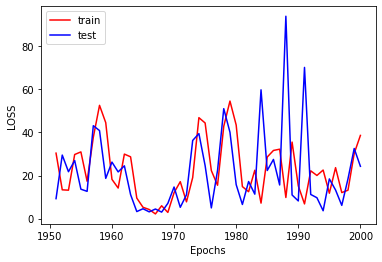

In [208]:
# Graficas de loss
plt.plot(epochs[1950:], loss[1950:], 'r')
plt.plot(epochs[1950:], val_loss[1950:], 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

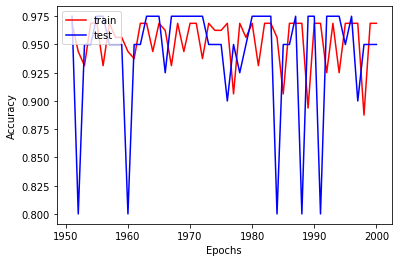

In [209]:
# Graficas de accuracy
plt.plot(epochs[1950:], accuracy[1950:], 'r')
plt.plot(epochs[1950:], val_accuracy[1950:], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The next pass is evaluate the test part, we create a function for compare the quantities of asserts and the percentages of assert.

In [210]:
# evaluamos el modelo
scores = model.evaluate(x_train, y)
y_t = []
ls = []
for i in y_test:
    ls = [0 for i in range(6)]
    ls[i] = 1
    y_t.append(ls)
y_t = pd.DataFrame(y_t)
y_predicted = model.predict(x_test).round()

5/5 [==============================] - 0s 3ms/step - loss: 30.5423 - accuracy: 0.9688


In [211]:
stadistics(convert_at_type_array(y_predicted),convert_at_type_array(y_t.to_numpy()))

print(convert_at_type_array(y_predicted))
print(convert_at_type_array(y_t.to_numpy())) 


Cantidad total de pruebas: 40
Cantidad total de aciertos: 38
Porcentaje de aciertos: 95.0%
[1, 5, 0, 5, 4, 5, 4, 2, 4, 0, 1, 2, 2, 4, 0, 0, 2, 1, 5, 2, 5, 5, 0, 4, 5, 1, 1, 0, 2, 4, 2, 4, 5, 4, 5, 1, 5, 4, 4, 2]
[1, 5, 0, 5, 3, 5, 4, 2, 4, 0, 1, 2, 2, 3, 0, 0, 2, 1, 5, 2, 5, 5, 0, 4, 5, 1, 1, 0, 2, 4, 2, 4, 5, 4, 5, 1, 5, 4, 4, 2]


The final pass is save the model. We save the best models in two files (json for the model and h5 file for the weights of the neuronal network).

In [212]:
name = "caso_guardado"

In [213]:
model_json = model.to_json()
with open("./jsons/"+name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("./h_fives/"+name+".h5")
print("Modelo Guardado!")

Modelo Guardado!


We realice many experiments using differents quantity of neourones and layers, changing the activation function also and we obtain differents results for each combination.

We also prove different activation functions and we got the results:
    
bad activation models (the worst functions in descending order): 

softsign, tanh, sigmoid, exponential
    
good activation models (the best functions in descending order):

selu, relu, softplus, softmax, elu


The bad functions of activation took a long time for improve his accuracy while the good activation models improve his accuracy inmediately, also we run the experiments more than one time so we get differents results based on the graphs where we compare accuracy and epochs.

## Results and conclusions

The results for the 7° best experiments are:
#### Experiment 1
190 -> train
 10 -> test 

4 inputs (Temperature, L, R, A_M)

10 neurones in a hidden layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

900 Epochs with 0.7411 of accuracy.

90% of asserts in the test part.

#### Experiment 2
160 -> train
 40 -> test 

4 inputs (Temperature, L, R, A_M)

10 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

1000 Epochs with 0.9750 of accuracy.

100.0% of asserts in the test part.
#### Experiment 3
160 -> train
 40 -> test

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

10 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

1482 Epochs with 0.9688 of accuracy.

100% of asserts in the test part.


#### Experiment 4

160 -> train
 40 -> test 

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

10 neurones in a hidden layer with elu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9625 of accuracy.

100% of asserts in the test part.
#### Experiment 5

160 -> train
 40 -> test 

24 inputs (Temperature, L, R, A_M,
whitish,red,pale yellow orange,white-yellow,blue,yellow-white,yellowish,yellowish white,orange-red,orange,white,blue white,blue-white,
O, F, G, K, A, M, B)

64 neurones in a hidden layer with selu function

32 neurones in the output layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

4000 Epochs with 0.9563 of accuracy.

97.5% of asserts in the test part.

#### Experiment 6

160 -> train
 40 -> test 

3 inputs (L, R, A_M)

64 neurones in a hidden layer with selu function

32 neurones in the output layer with relu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9125  of accuracy.

97.5% of asserts in the test part.

#### Experiment 7

160 -> train
 40 -> test 

3 inputs (L, R, A_M)

64 neurones in a hidden layer with selu function

6 neurones in the output layer with softmax function

For the compile:

loss ='categorical_crossentropy'

optimizer='adam'

metrics='accuracy'

2000 Epochs with 0.9688  of accuracy.

95.0% of asserts in the test part.


When we save all the results we compare all the cases with the best score, the 3° experiment get the best result to be applied and we use this for the competition.
For the experiments we test mainly with 3 types of input, only the numerics, all the columns and the 3 best columns based on covariance.
The best models are those that applied all the columns and had the smallest graph architecture, see 3° experiment which turned out to be the best of the 7° experiments obtained.
It is important to mention that the amount of high epoch helps to find a good neural network even though it takes a long time to model when performing epochs are recommended because you get better results and you have a better range to see where the epochs got a better accuracy in the graphs of losses and epochs which helped a lot to obtain the best result.

### Bibliografy
#### Open a CSV
https://code.tutsplus.com/es/tutorials/how-to-read-and-write-csv-files-in-python--cms-29907
#### Save in a dataframe pandas
https://realpython.com/pandas-python-explore-dataset/
#### Aleatory values for a list 
ttps://www.iteramos.com/pregunta/17907/la-mejor-manera-de-aleatorizar-una-lista-de-cuerdas-en-python

#### excel
https://gonzalezgouveia.com/como-exportar-data-frames-de-pandas-a-csv-o-excel-en-python/
https://www.delftstack.com/es/howto/python-pandas/pandas-remove-index/#:~:text=Si%20queremos%20eliminar%20la%20columna,en%20el%20m%C3%A9todo%20reset_index()%20
#### dataframe  
https://www.codigopiton.com/como-crear-un-dataframe-con-pandas-y-python/
#### concatenar dataframes
https://www.analyticslane.com/2018/09/10/unir-y-combinar-dataframes-con-pandas-en-python/

#### Covariance with its explanation and application
https://www.sdelsol.com/glosario/covarianza/

#### Correlation with its explanation and application
https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/